<a href="https://colab.research.google.com/github/mafecala/compuvisual/blob/master/rasterizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

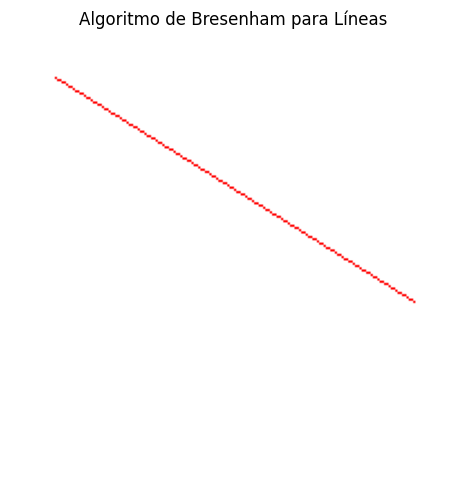

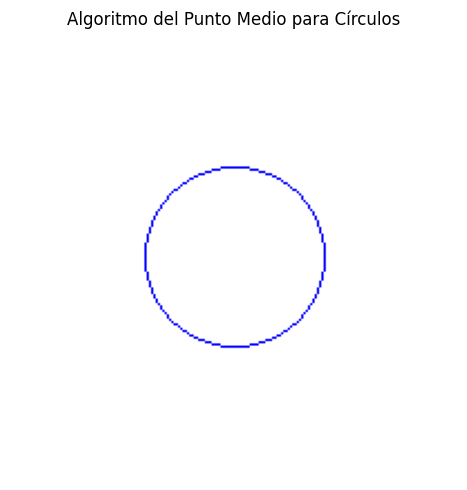

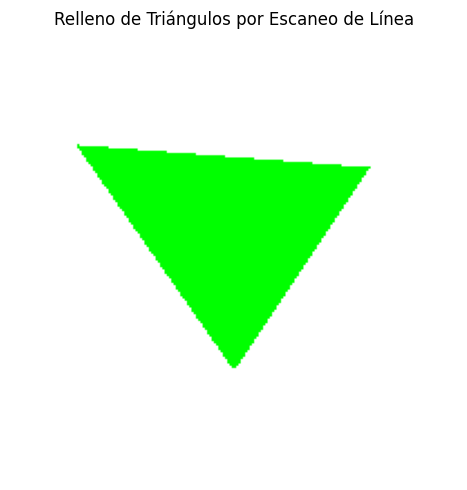

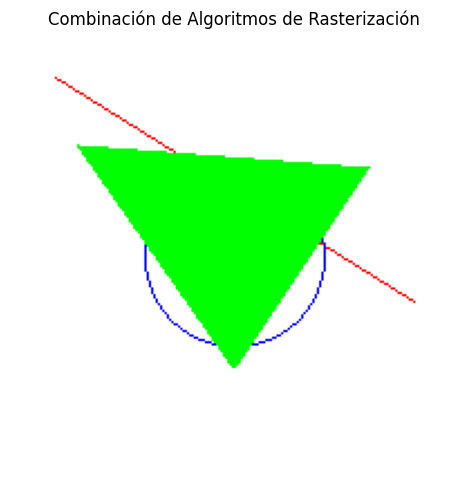

Taller completado. Se han generado las imágenes: linea.png, circulo.png, triangulo.png y combinado.png


In [1]:
# Taller de Computación Gráfica: Algoritmos Básicos de Rasterización
# Importamos las bibliotecas necesarias
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

# Configuración inicial
width, height = 200, 200

# Función para crear una nueva imagen
def create_image():
    return Image.new('RGB', (width, height), 'white')

# Algoritmo de Bresenham para dibujar líneas
def bresenham(image, x0, y0, x1, y1):
    pixels = image.load()
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        pixels[x0, y0] = (255, 0, 0)  # Color rojo
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

    return image

# Algoritmo de punto medio para dibujar círculos
def midpoint_circle(image, x0, y0, radius):
    pixels = image.load()
    x = radius
    y = 0
    p = 1 - radius

    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixels[x0 + dx, y0 + dy] = (0, 0, 255)  # Color azul

        y += 1
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1

    return image

# Algoritmo para rellenar un triángulo usando escaneo de línea
def fill_triangle(image, p1, p2, p3):
    pixels = image.load()
    # Ordenar puntos por coordenada y
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0:
            return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    # Calcular los bordes interpolando entre los puntos
    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x13
    x_right = x12 + x23

    # Si los arreglos tienen longitudes diferentes, ajustar
    if len(x_left) > len(x_right):
        x_left = x_left[:len(x_right)]
    elif len(x_right) > len(x_left):
        x_right = x_right[:len(x_left)]

    # Rellenar el triángulo escaneando horizontalmente
    for y, xl, xr in zip(range(y1, y3), x_left, x_right):
        for x in range(min(xl, xr), max(xl, xr) + 1):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0)  # Color verde

    return image

# Función para visualizar y guardar la imagen
def show_and_save(image, title, filename):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Ejemplo 1: Línea usando Bresenham
linea_img = create_image()
linea_img = bresenham(linea_img, 20, 20, 180, 120)
show_and_save(linea_img, "Algoritmo de Bresenham para Líneas", "linea.png")

# Ejemplo 2: Círculo usando algoritmo del punto medio
circulo_img = create_image()
circulo_img = midpoint_circle(circulo_img, 100, 100, 40)
show_and_save(circulo_img, "Algoritmo del Punto Medio para Círculos", "circulo.png")

# Ejemplo 3: Triángulo relleno usando escaneo de línea
triangulo_img = create_image()
triangulo_img = fill_triangle(triangulo_img, (30, 50), (100, 150), (160, 60))
show_and_save(triangulo_img, "Relleno de Triángulos por Escaneo de Línea", "triangulo.png")

# Ejemplo 4: Combinación de todas las figuras
combinado_img = create_image()
combinado_img = bresenham(combinado_img, 20, 20, 180, 120)
combinado_img = midpoint_circle(combinado_img, 100, 100, 40)
combinado_img = fill_triangle(combinado_img, (30, 50), (100, 150), (160, 60))
show_and_save(combinado_img, "Combinación de Algoritmos de Rasterización", "combinado.png")

print("Taller completado. Se han generado las imágenes: linea.png, circulo.png, triangulo.png y combinado.png")